In [18]:
import json 
from loki.loki import Loki
from loki.traveltimes import Traveltimes
import os
import matplotlib.pyplot as plt
import numpy as np

In [19]:
#work directory
db_path = '/home/emanuele/data/emanuele/loki-das/Traveltimes/new2/'
hdr_filename = 'header_long.hdr'
geometry_filename_stat = 'stations.dat'
geometry_filename_fiber = 'stations.dat'

## CREATE Traveltimes with NonLinLoc

In [20]:
#create traveltimes with NonLinLoc

#create the grid 
os.system("""
    /home/emanuele/LOKI-DAS/NLL5.00_bin_linux_64/bin/Vel2Grid /home/emanuele/LOKI-DAS/TEST_NLL/das_p.run
""")
#traveltimes
os.system("""
    /home/emanuele/LOKI-DAS/NLL5.00_bin_linux_64/bin/Grid2Time /home/emanuele/LOKI-DAS/TEST_NLL/das_p.run
""")


Vel2Grid (NonLinLoc v5.00.0 02Sep2008) 
Creating model grid files: /home/emanuele/data/emanuele/loki-das/Traveltimes/new2/layer.P.mod.*
Grid2Time (NonLinLoc v5.00.0 02Sep2008) 

Calculating travel times for source: HM00  X 0.0000  Y 0.0000  Z 0.0000 ...
Source:  Velocity: 1.800000 km/sec  GridLoc: ix=0.000000 iy=0.000000 iz=0.000000
Finished calculation, time grid output files: /home/emanuele/data/emanuele/loki-das/Traveltimes/new2/layer.P.HM00.*


0

## Load Traveltimes with Loki

In [21]:
#object

tt = Traveltimes(db_path, hdr_filename, geometry_filename_fiber, geometry_filename_stat)

print(tt)
print("All attributes and methods:", dir(tt))

proj=longlat datum=WGS84 no_defs ellps=WGS84 towgs84=0,0,0
X,Y,Z 532821.0799571068 3930496.1629478466 0.0
7.72 51.64 0.0 532821.0799571068 3930496.1629478466 0.0
532821.0799571068
a
7.73717 51.67223 0.0
X,Y,Z 533620.2816357955 3927549.4641285376 0
0.7992016786886379 2.9466988193090073 0.0
a
7.74178 51.65656 0.0
X,Y,Z 534120.5107916091 3928861.605523546 0
1.2994308345022145 1.6345574243003502 0.0
a
7.74745 51.66499 0.0
X,Y,Z 534410.1360898702 3928079.778198003 0
1.5890561327633914 2.416384749843739 0.0
a
7.73808 51.66097 0.0
X,Y,Z 533814.9782038125 3928514.7539793784 0
0.9938982467056485 1.9814089684681968 0.0
a
7.74283 51.6589 0.0
X,Y,Z 534164.9999192697 3928649.480595103 0
1.3439199621628504 1.8466823527435772 0.0
a
7.75079 51.65965 0.0
X,Y,Z 534701.9681899373 3928510.380638951 0
1.8808882328304461 1.9857823088956066 0.0
a
7.74071 51.65704 0.0
X,Y,Z 534041.497458579 3928830.0750616193 0
1.2204175014721697 1.6660878862272948 0.0
a
7.74555 51.65624 0.0
X,Y,Z 534382.7878797255 3928854.12

Grid dimensions (nx, nz): 101, 71
Grid origin (x0, z0): 0.0, 0.0
Grid spacing (dx, dz): 0.071, 0.071
dtt: 0.071
ref x: [0.         0.05020458 0.10040916 0.15061374 0.20081833 0.25102291
 0.30122749 0.35143207 0.40163665 0.45184123 0.50204581 0.5522504
 0.60245498 0.65265956 0.70286414 0.75306872 0.8032733  0.85347788
 0.90368247 0.95388705 1.00409163 1.05429621 1.10450079 1.15470537
 1.20490996 1.25511454 1.30531912 1.3555237  1.40572828 1.45593286
 1.50613744 1.55634203 1.60654661 1.65675119 1.70695577 1.75716035
 1.80736493 1.85756951 1.9077741  1.95797868 2.00818326 2.05838784
 2.10859242 2.158797   2.20900158 2.25920617 2.30941075 2.35961533
 2.40981991 2.46002449 2.51022907 2.56043365 2.61063824 2.66084282
 2.7110474  2.76125198 2.81145656 2.86166114 2.91186572 2.96207031
 3.01227489 3.06247947 3.11268405 3.16288863 3.21309321 3.2632978
 3.31350238 3.36370696 3.41391154 3.46411612 3.5143207  3.56452528
 3.61472987 3.66493445 3.71513903 3.76534361 3.81554819 3.86575277
 3.91595735 

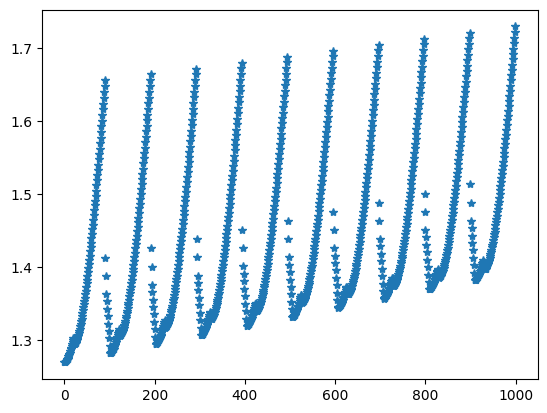

In [22]:
#object

#tt = Traveltimes(db_path, hdr_filename, geometry_filename)

# Access loaded data
print(f"Grid dimensions (nx, nz): {tt.nx}, {tt.nz}")
print(f"Grid origin (x0, z0): {tt.x0}, {tt.z0}")
print(f"Grid spacing (dx, dz): {tt.dx}, {tt.dz}")
print(f"dtt: {tt.dtt}")
print(f"ref x: {tt.x}")
print(f"ref x: {tt.refsta}")


stations = tt.load_station_info()

time = tt.load_traveltimes('P', label='layer', precision='single')


for key, value in time.items():
    print(f"{key}: {value}")
    plt.plot(value[len(value)-1000:len(value)], '*')




In [23]:
hdr_path = db_path + 'layer.S.HM00.time.hdr'
buf_path = db_path + 'layer.S.HM00.time.buf'

def read_hdr_file(header_path):
    """
    Reads the header (.hdr) file to extract metadata about the .buf file.

    Parameters:
        header_path (str): Path to the .hdr file.

    Returns:
        dict: Metadata including grid dimensions, spacings, and offsets.
    """
    metadata = {}
    with open(header_path, 'r') as hdr_file:
        lines = hdr_file.readlines()
        
        # Parse the first line for essential metadata
        first_line = lines[0].split()
        metadata['NX'] = int(first_line[1])  # Number of distances
        metadata['NY'] = int(first_line[2])  # Number of depths
        metadata['X0'] = float(first_line[3])  # Distance offset
        metadata['Y0'] = float(first_line[4])  # Depth offset
        metadata['Z0'] = float(first_line[5])  # Unused here but included in case
        metadata['DX'] = float(first_line[6])  # Distance spacing
        metadata['DY'] = float(first_line[7])  # Depth spacing

    print("Extracted Metadata:", metadata)  # Debug output
    return metadata

def read_buf_file(buf_path, metadata):
    """
    Reads the .buf file based on metadata from the .hdr file.

    Parameters:
        buf_path (str): Path to the .buf file.
        metadata (dict): Metadata extracted from the .hdr file.

    Returns:
        tuple: (travel_times, distances, depths)
            travel_times (2D numpy array): Travel times matrix with shape (NX, NY).
            distances (1D numpy array): Array of distances.
            depths (1D numpy array): Array of depths.
    """
    NX = metadata['NX']
    NY = metadata['NY']
    DX = metadata['DX']
    DY = metadata['DY']
    X0 = metadata['X0']
    Y0 = metadata['Y0']

    # Generate distance and depth arrays
    distances = X0 + np.arange(0, NX) * DX
    depths = Y0 + np.arange(0, NY) * DY

    # Read the binary data
    with open(buf_path, 'rb') as file:
        travel_times = np.fromfile(file, dtype=np.float32)

    # Reshape the 1D travel times array into a 2D matrix (NX x NY)
    travel_times = travel_times.reshape((NX, NY))

    return travel_times, distances, depths



# Read header to get metadata
metadata = read_hdr_file(hdr_path)

# Read the .buf file using the extracted metadata
travel_times, distances, depths = read_buf_file(buf_path, metadata)

# Print details
print("Travel Times Matrix Shape:", travel_times.shape)
print("Distances:", distances)
print("Depths:", depths)


Extracted Metadata: {'NX': 101, 'NY': 101, 'X0': 0.0, 'Y0': 0.0, 'Z0': 0.0, 'DX': 0.05, 'DY': 0.05}
Travel Times Matrix Shape: (101, 101)
Distances: [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05
 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75
 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45
 3.5  3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.   4.05 4.1  4.15
 4.2  4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75 4.8  4.85
 4.9  4.95 5.  ]
Depths: [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05
 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75
 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2 

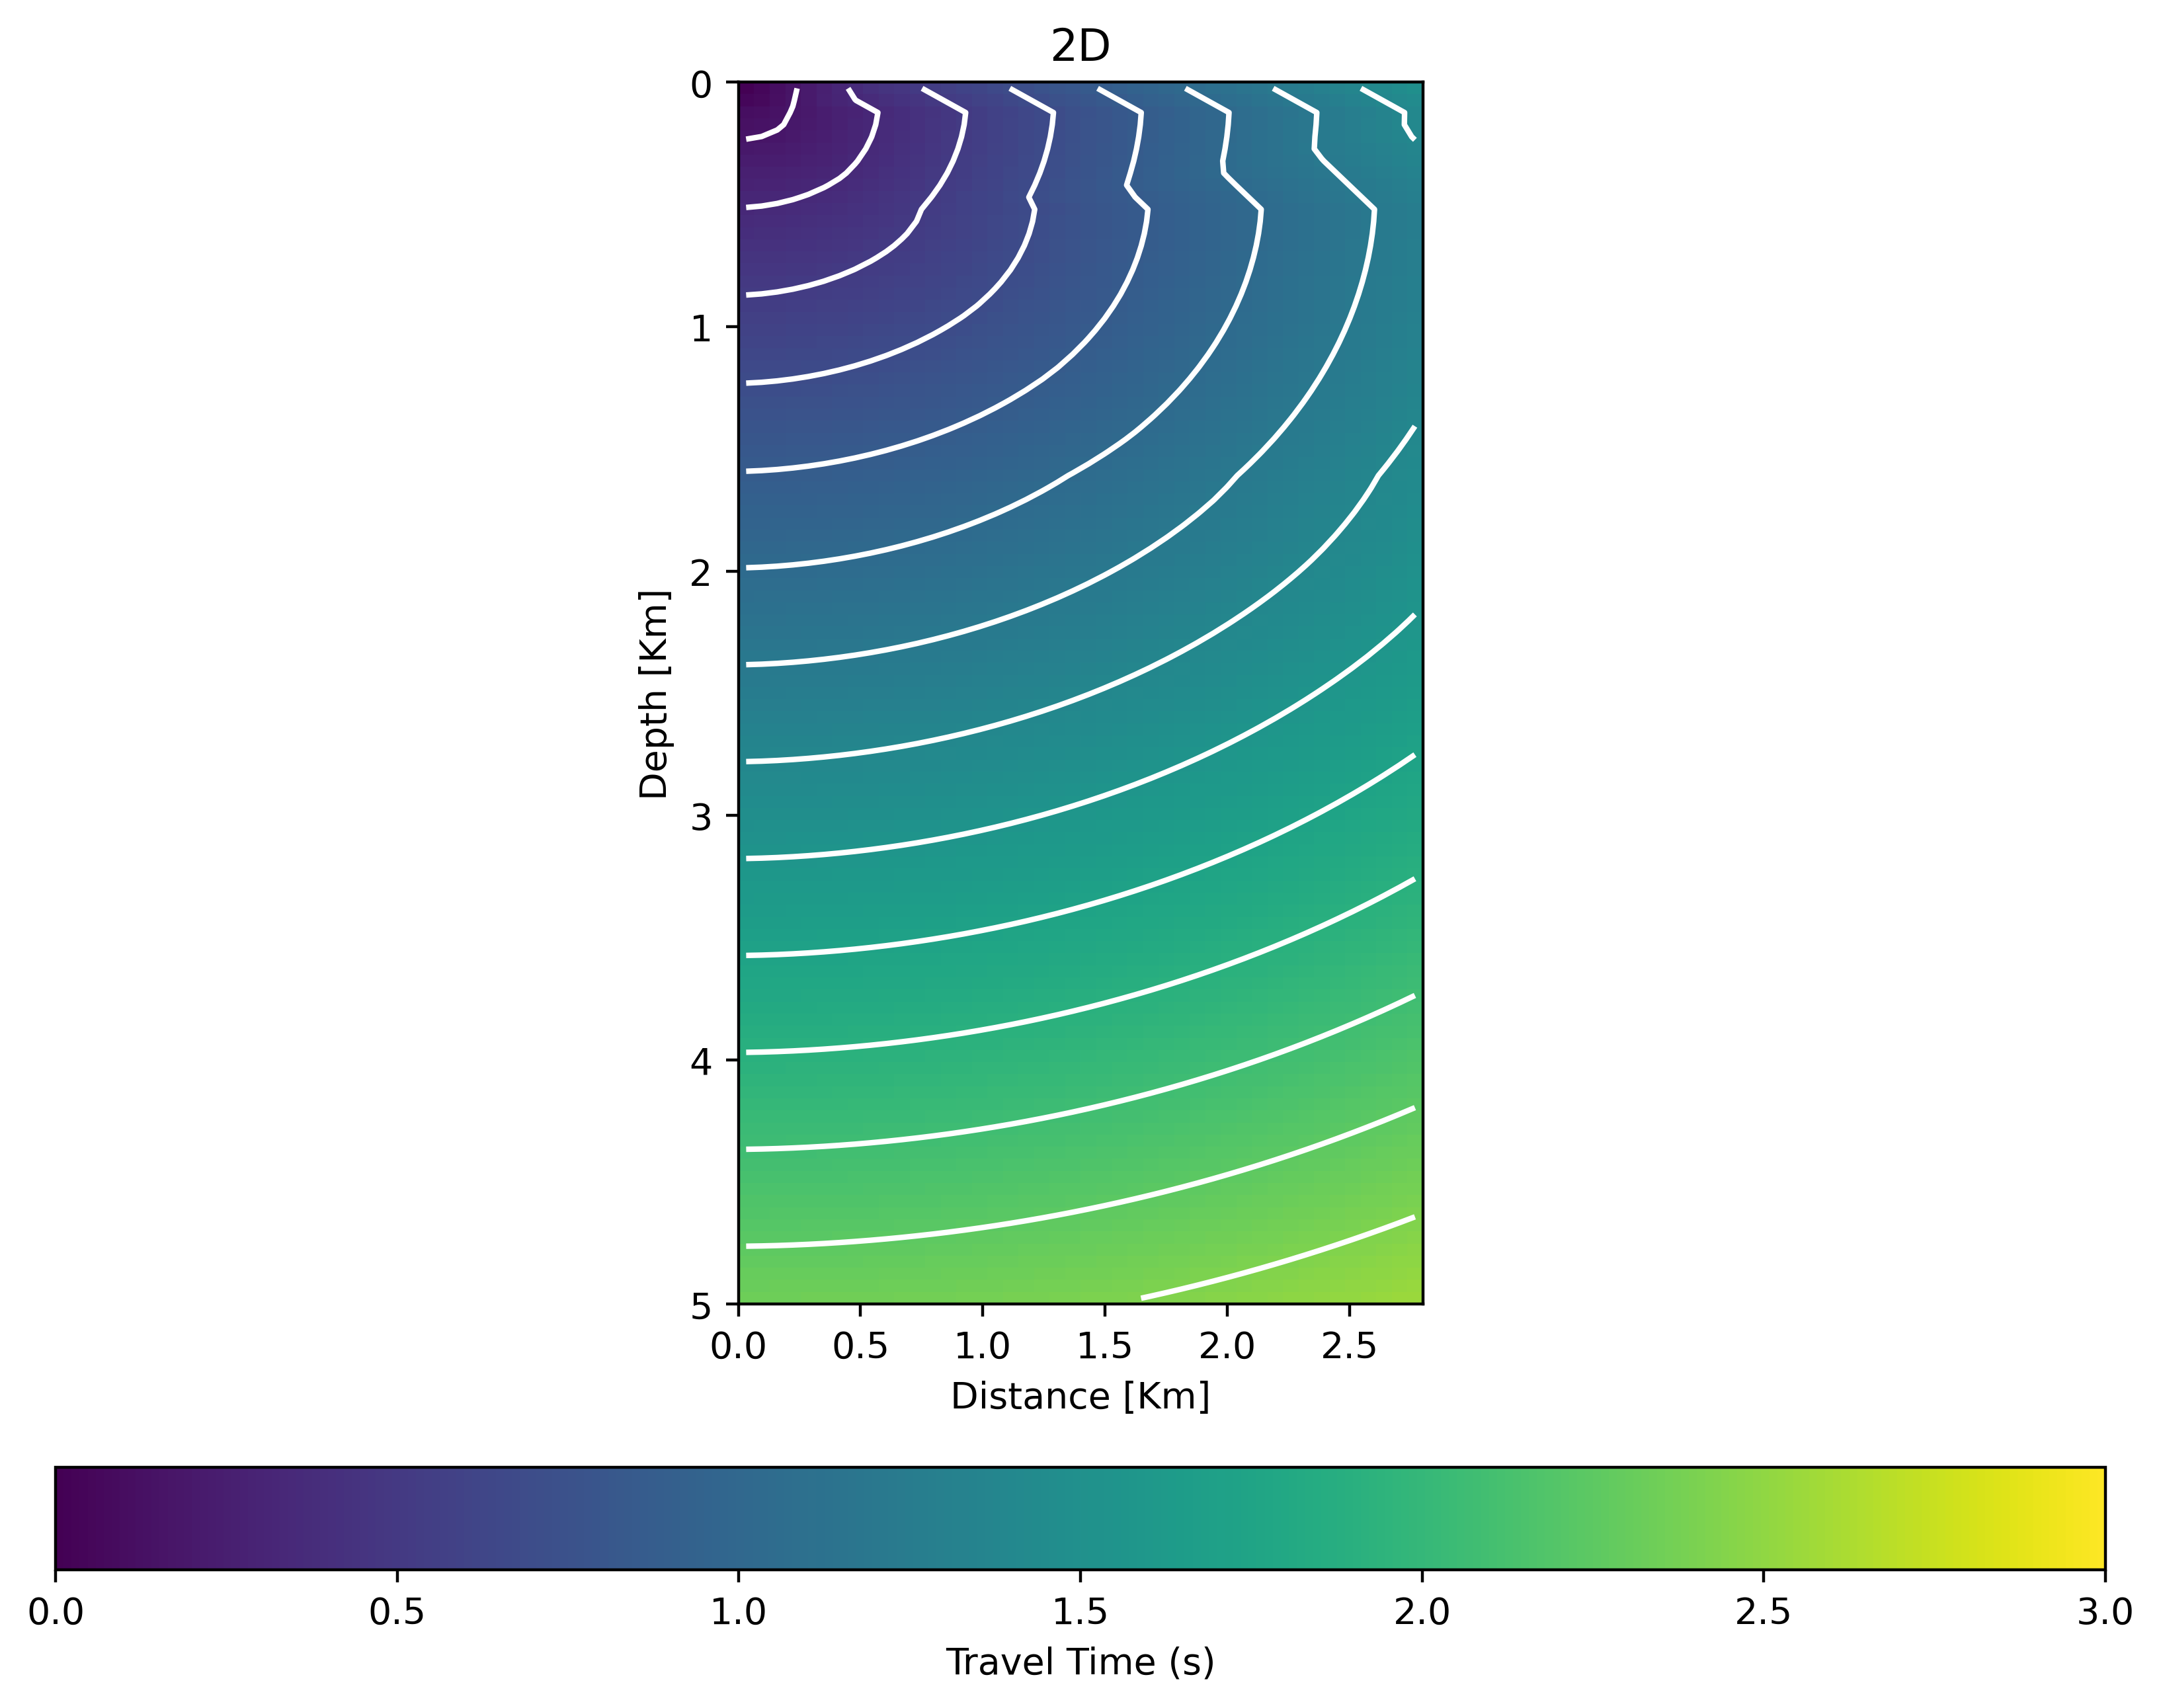

In [25]:


def plot_travel_times(travel_times, distances, depths):
    """
    Plots the 2D matrix of travel times with distance and depth, ensuring that low travel times (blue)
    are closer to the left side (low distances) of the plot.

    Parameters:
        travel_times (2D numpy array): Travel times matrix.
        distances (1D numpy array): Distance values.
        depths (1D numpy array): Depth values.
    """
    plt.figure(figsize=(10, 8), dpi= 400)

    # Flip the travel times vertically (along depth) but keep distances intact
    flipped_travel_times = np.flipud(travel_times.T)

    # Define the extent for the axes
    extent = [0, 2.8, depths.min(), depths.max()]

    # Plot the heatmap
    im = plt.imshow(flipped_travel_times[:,:44], extent=extent, origin='upper', aspect='equal', cmap='viridis', vmin=0, vmax=3)

    levels = np.linspace(flipped_travel_times.min(), flipped_travel_times.max(), 20)

# Adding contours on top of the image
    plt.contour(flipped_travel_times[:,:44], levels=levels, extent=extent, origin='upper', colors='white')


    # Add a horizontal colorbar
    cbar = plt.colorbar(im, orientation='horizontal', pad=0.1)
    cbar.set_label('Travel Time (s)')

    # Place Y-axis ticks at the top and invert the depth axis
    plt.gca().xaxis.set_ticks_position('bottom')  # X ticks stay at the bottom
    plt.gca().yaxis.set_ticks_position('left')    # Y ticks stay on the left
    plt.gca().invert_yaxis()  # Invert Y-axis to make depth increase downward

    # Add labels and title
    plt.xlabel('Distance [Km]')
    plt.ylabel('Depth [Km]')
    plt.title('2D')

    # Display the plot
    plt.show()

# Example usage
plot_travel_times(travel_times, distances, depths)
